In [1]:
#Image Inverse
import cv2

# Opening the image.
im = cv2.imread('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/imageinverse_input.png')
# Performing the inversion operation
im2 = 255 - im
# Saving the image as imageinverse_output.png in
# Figures folder.
cv2.imwrite('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/imageinverse_output.png', im2)


True

In [2]:
# Histogram Equalization
import cv2
import numpy as np 
# Opening the image.
img1 = cv2.imread('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/hequalization_input.png')
# 2D array is converted to a 1D array.
fl = img1.flatten()
# Histogram and the bins of the image are computed.
hist,bins = np.histogram(img1,256,[0,255])
# cumulative distribution function is computed 
cdf = hist.cumsum()
# Places where cdf=0 is masked or ignored and 
# rest is stored in cdf_m.
cdf_m = np.ma.masked_equal(cdf,0)
# Histogram equalization is performed.
num_cdf_m = (cdf_m - cdf_m.min())*255
den_cdf_m = (cdf_m.max()-cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
# The masked places in cdf_m are now 0.
cdf = np.ma.filled(cdf_m,0).astype('uint8')
# cdf values are assigned in the flattened array.
im2 = cdf[fl]
# im2 is 1D so we use reshape command to.
#  make it into 2D. 
im3 = np.reshape(im2,img1.shape)
# Saving im3 as hequalization_output.png
# in Figures folder 
cv2.imwrite('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/hequalization_output.png', im3)


True

In [ ]:
#Local Normalization
import pydicom
import numpy as np
import skimage.exposure as imexp
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from PIL import Image

def localfilter(im, sigma=(10, 10,)):
    im_gaussian = gaussian_filter(im, sigma=sigma[0])
    d = im_gaussian-im
    s = np.sqrt(gaussian_filter(d*d, sigma=sigma[1]))
    # form an array where all elements have a value of mean(s)
    mean_array = np.ones(s.shape)*np.mean(s)
    # find element by element maximum between mean_array and s
    max_array = np.maximum(mean_array, s)
    y = d/(max_array+np.spacing(1.0))
    return y

file_name = "C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/FluroWithDisplayShutter.dcm"
dfh = pydicom.read_file(file_name, force=True)
im = dfh.pixel_array
# convert to float and scale before applying filter
im = im.astype(np.float)
im1 = im/np.max(im)

sigma = (5, 5,)
im2 = localfilter(im, sigma) 
# rescale to 8-bit
im3 = 255*(im2-im2.min())/(im2.max()-im2.min())

im4 = Image.fromarray(im3).convert("L")
im4.save('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/local_normalization_output.png')
im4.show()

In [1]:
# Log Transform

import cv2
import numpy, math

# Opening the image.
a = cv2.imread('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/bse.png')
# a is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b2 = numpy.max(b1)
# Performing the log transformation.
c = (255.0*numpy.log(1+b1))/numpy.log(1+b2)
# c is converted to type int.
c1 = c.astype(int)
# Saving c1 as logtransform_output.png.
cv2.imwrite('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/logtransform_output.png', c1)

True

C:\Users\ROHINI\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


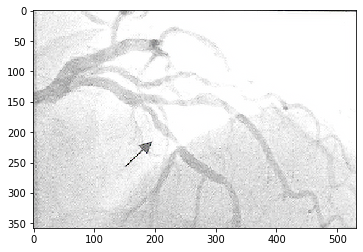

In [3]:
# Gamma correction
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Opening the image.
a = cv2.imread('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/angiogram1.png')
# gamma is initialized.
gamma = 0.5
# b is converted to type float.
b1 = a.astype(float)
# Maximum value in b1 is determined.
b3 = np.max(b1)
# b1 is normalized 
b2 = b1/b3
# gamma-correction exponent is computed.
b4 = np.log(b2)*gamma
# gamma-correction is performed.
c = np.exp(b4)*255.0
# c is converted to type int.
c1 = c.astype(int)
# Displaying c1
plt.imshow(c1)


In [ ]:
# Sigmoid Correction

import cv2
from skimage.exposure import adjust_sigmoid

# Reading the image.
img1 = cv2.imread('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/hequalization_input.png')
# Applying Sigmoid correction.
img2 =  adjust_sigmoid(img1, gain=15)
# Saving img2.
cv2.imwrite('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/sigmoid_output.png', img2)


In [4]:
# Contrast Stretching
import cv2

# Opening the image.
im = cv2.imread('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/hequalization_input.png')
# Finding the maximum and minimum pixel values
b = im.max()
a = im.min()
print(a,b)
# Converting im1 to float.
c = im.astype(float)
# Contrast stretching transformation.
im1 = 255.0*(c-a)/(b-a+0.0000001)
# Saving im2 as contrast_output.png in
# Figures folder 
cv2.imwrite('C:/Users/ROHINI/Desktop/KCE-GL/Python-IP/Demo/Figures_IE/contrast_output2.png', im1) 

0 255


True